<a href="https://colab.research.google.com/github/MulamHema/ml_intern/blob/main/task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df = pd.read_csv('/content/train (1).csv')
test_df = pd.read_csv('/content/test (1).csv')

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [ ]:
train_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
test_df.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [ ]:
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
train_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
test_df.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


array([[<Axes: title={'center': 'battery_power'}>,
        <Axes: title={'center': 'blue'}>,
        <Axes: title={'center': 'clock_speed'}>,
        <Axes: title={'center': 'dual_sim'}>,
        <Axes: title={'center': 'fc'}>],
       [<Axes: title={'center': 'four_g'}>,
        <Axes: title={'center': 'int_memory'}>,
        <Axes: title={'center': 'm_dep'}>,
        <Axes: title={'center': 'mobile_wt'}>,
        <Axes: title={'center': 'n_cores'}>],
       [<Axes: title={'center': 'pc'}>,
        <Axes: title={'center': 'px_height'}>,
        <Axes: title={'center': 'px_width'}>,
        <Axes: title={'center': 'ram'}>,
        <Axes: title={'center': 'sc_h'}>],
       [<Axes: title={'center': 'sc_w'}>,
        <Axes: title={'center': 'talk_time'}>,
        <Axes: title={'center': 'three_g'}>,
        <Axes: title={'center': 'touch_screen'}>,
        <Axes: title={'center': 'wifi'}>],
       [<Axes: title={'center': 'price_range'}>, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >]], 

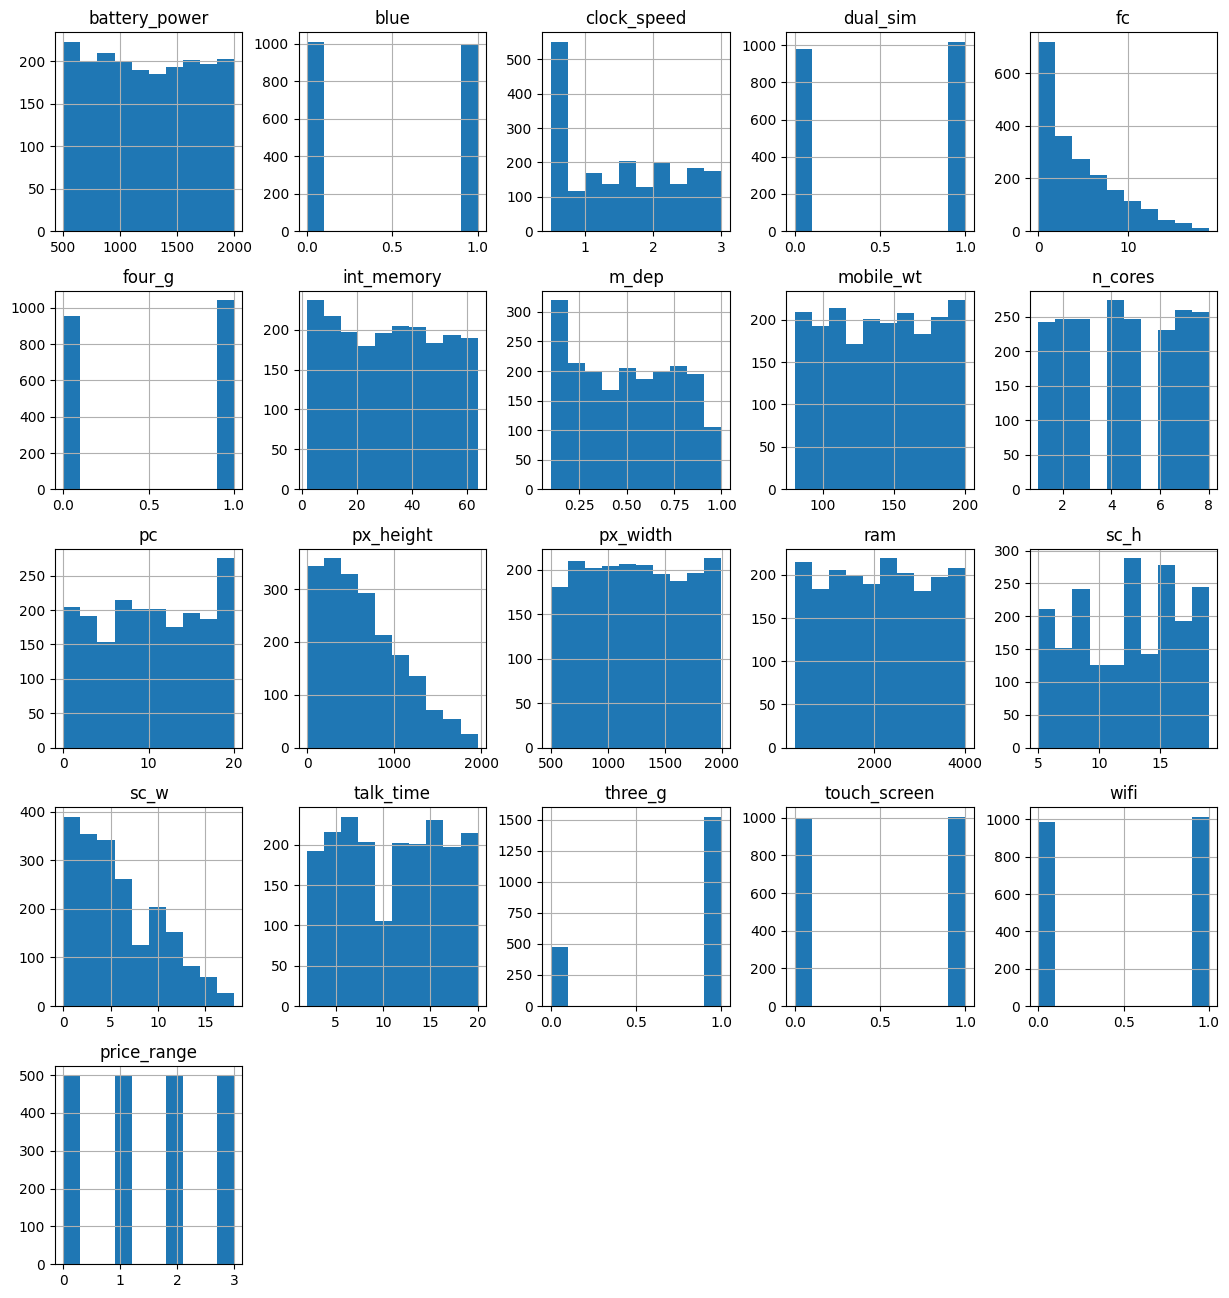

In [ ]:
train_df.hist(figsize=(15,16))

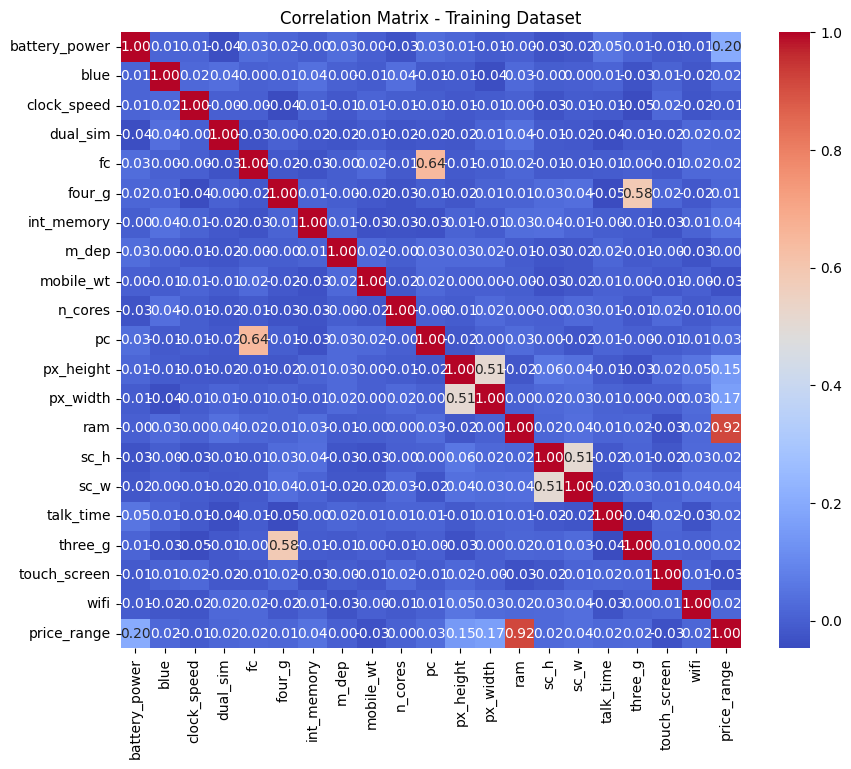

In [ ]:
# Visualize the correlation matrix for the training dataset
correlation_matrix_train = train_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_train, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Training Dataset')
plt.show()

In [ ]:
X_train = train_df.drop('price_range', axis=1)  # Assuming 'price_range' is the column to predict
y_train = train_df['price_range']
X_test = test_df.drop('id', axis=1)

 Random Forest Classifier

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions on the testing dataset
rf_predictions = rf_classifier.predict(X_test)

 XGBoost Classifier

In [ ]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Predictions on the testing dataset
xgb_predictions = xgb_classifier.predict(X_test)

In [ ]:
rf_predictions_df = pd.DataFrame({'id': test_df['id'], 'predicted_price_range_rf': rf_predictions})
xgb_predictions_df = pd.DataFrame({'id': test_df['id'], 'predicted_price_range_xgb': xgb_predictions})


In [ ]:
# Save the predictions to CSV files
rf_predictions_df.to_csv('rf_predictions.csv', index=False)
xgb_predictions_df.to_csv('xgb_predictions.csv', index=False)

In [ ]:
rf_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   id                        1000 non-null   int64
 1   predicted_price_range_rf  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


In [ ]:
rf_predictions_df.describe()

,id,predicted_price_range_rf
count,1000.000000,1000.000000
mean,500.500000,1.506000
std,288.819436,1.137215
min,1.000000,0.000000
25%,250.750000,0.000000
50%,500.500000,1.000000
75%,750.250000,3.000000
max,1000.000000,3.000000


In [ ]:
xgb_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   id                         1000 non-null   int64
 1   predicted_price_range_xgb  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


In [ ]:
xgb_predictions_df.describe()

,id,predicted_price_range_xgb
count,1000.000000,1000.000000
mean,500.500000,1.526000
std,288.819436,1.135171
min,1.000000,0.000000
25%,250.750000,0.000000
50%,500.500000,2.000000
75%,750.250000,3.000000
max,1000.000000,3.000000
